In [132]:
#Part 1
import cv2
from PIL import Image
from pylab import *
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize

#determin if picture has saturated pixels
def isSaturated(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 255:
                print('saturated')
                return False
    return True
#print(isSaturated(b))



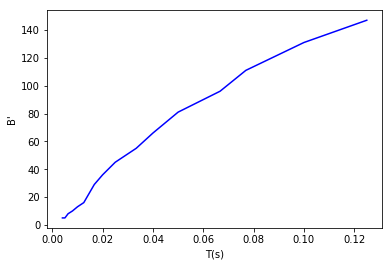

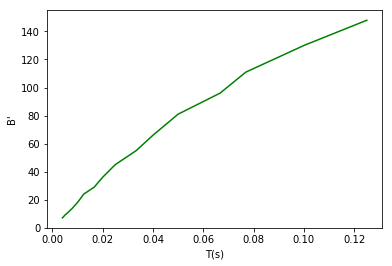

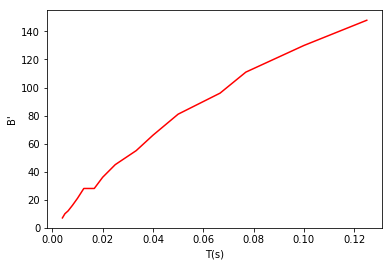

[4, 3, 5, 5, 8, 10, 13, 16, 29, 36, 45, 55, 66, 81, 96, 111, 131, 147, 155, 163, 174, 188, 205, 223, 242, 252, 254] [4, 5, 7, 9, 11, 14, 18, 24, 29, 36, 45, 55, 66, 81, 96, 111, 130, 148, 164, 183, 197, 212, 227, 238, 247, 254, 255] [4, 6, 7, 10, 12, 16, 21, 28, 28, 36, 45, 55, 66, 81, 96, 111, 130, 148, 171, 197, 214, 228, 241, 249, 254, 254, 255]
27


In [155]:
#Part1
T = [1/400, 1/320, 1/250, 1/200, 1/160, 1/125, 1/100, 1/80, 1/60, 1/50, 1/40, 1/30, 1/25, 1/20, 1/15, 1/13, 1/10, 1/8, 1/6, 1/5, 1/4, 0.3]
papers = []  #the brightness of paper with different T
path = 'Sunshine'
files = os.listdir(path)
files = sorted(files,  key=lambda x: os.path.getmtime(os.path.join(path, x))) #sort these pictures by time
#files = files[::-1]
#print(files)
papers = [] * (len(files) - 1)

#append all of the brightness of paper to the list
for i in range(1, len(files)):
    if not os.path.isdir(files[i]):
        papers.append(cv2.imread(path + '/' + files[i], cv2.IMREAD_COLOR)) 
#print(papers)


brightnessB, brightnessG, brightnessR = [], [], [] # the brightness of three channels

#append average brightness of three channels to corresponding list
for i in range(len(papers) - 1):
    b, g, r = cv2.split(papers[i])
    bf = b.flatten()
    gf = g.flatten()
    rf = r.flatten()
    brightnessB.append(int(sum(bf) / len(bf)))
    brightnessG.append(int(sum(gf) / len(gf)))
    brightnessR.append(int(sum(rf) / len(rf)))
    #brightnessB, brightnessG, brightnessR = brightnessB[::-1], brightnessG[::-1], brightnessR[::-1]
    
#plot B' against T of three channels
start, end = 2, 19
plt.plot(T[start:end], brightnessB[start:end], 'blue')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
plt.plot(T[start:end], brightnessG[start:end], 'green')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
plt.plot(T[start:end], brightnessR[start:end], 'red')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
print(brightnessB, brightnessG, brightnessR)
print(len(brightnessB))
#hist(bf, 25)



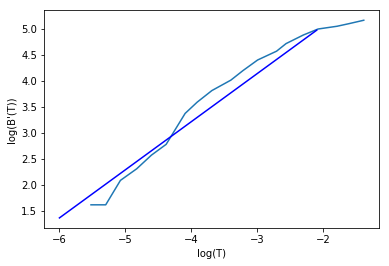

a = 0.9256806547633514 b = 6.911678043894905


In [134]:
#curve fit
def lineTB(x, A, B):
    return A * x + B

logT = [math.log(T[i]) for i in range(len(T))]
logBrightnessB = [math.log(brightnessB[i]) for i in range(len(brightnessB))]
logBrightnessG = [math.log(brightnessG[i]) for i in range(len(brightnessG))]
logBrightnessR = [math.log(brightnessR[i]) for i in range(len(brightnessR))]

#plot log(B') against log(T) of blue channel and do the curve fit
aB, kB = optimize.curve_fit(lineTB, logT[start:end], logBrightnessB[start:end])[0]
xB = np.arange(-6, -2, 0.1)
yB = aB * xB + kB
plt.plot(logT[start:end], logBrightnessB[start:end])
plt.plot(xB, yB, 'blue')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print("a = "+ str(aB), "b = "+ str(kB)) #log(B’(T)) = kB + aB * log(T).

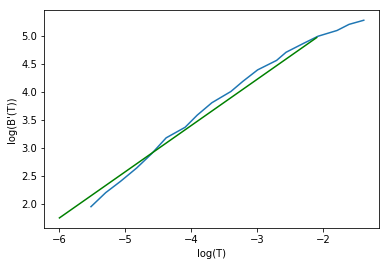

a = 0.8278366638420492 b = 6.711691339115394


In [135]:
#plot log(B') against log(T) of green channel and do the curve fit
aG, kG = optimize.curve_fit(lineTB, logT[start:end], logBrightnessG[start:end])[0]
xG = np.arange(-6, -2, 0.1)
yG = aG * xG + kG
plt.plot(logT[start:end], logBrightnessG[start:end])
plt.plot(xG, yG, 'green')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print("a = "+ str(aG), "b = "+ str(kG)) #log(B’(T)) = kB + aB * log(T).

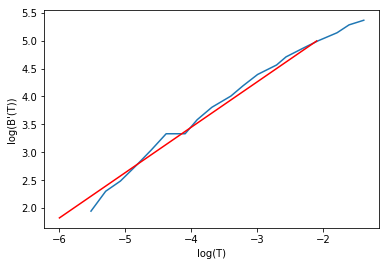

a = 0.8130915962502038 b = 6.7028560102090955


In [136]:
#plot log(B') against log(T) of red channel and do the curve fit
aR, kR = optimize.curve_fit(lineTB, logT[start:end], logBrightnessR[start:end])[0]
xR = np.arange(-6, -2, 0.1)
yR = aR * xR + kR
plt.plot(logT[start:end], logBrightnessR[start:end])
plt.plot(xR, yR, 'red')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print("a = "+ str(aR), "b = "+ str(kR)) #log(B’(T)) = kB + aB * log(T).

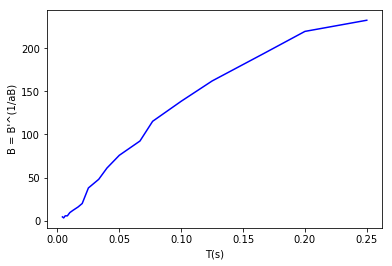

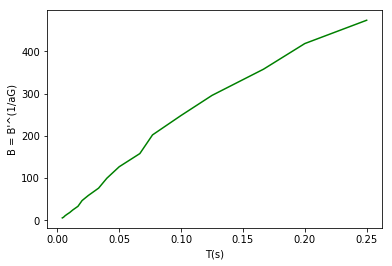

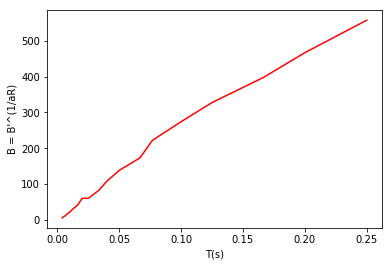

In [137]:
#plotting B'^(g) against T for three channels
bPrimeB = [brightnessB[i] ** (1 / aB) for i in range(len(brightnessB[start:end]))]
bPrimeG = [brightnessG[i] ** (1 / aG) for i in range(len(brightnessG[start:end]))]
bPrimeR = [brightnessR[i] ** (1 / aR) for i in range(len(brightnessR[start:end]))]
plt.plot(T[start:end], bPrimeB, 'blue')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aB)")
plt.show()
plt.plot(T[start:end], bPrimeG, 'green')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aG)")
plt.show()
plt.plot(T[start:end], bPrimeR, 'red')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aR)")
plt.show()

[12 13 13 ...  2  2  2]


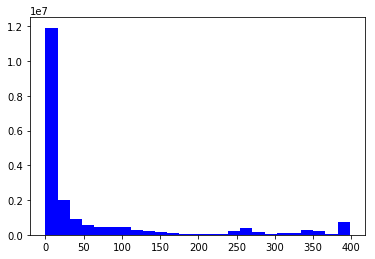

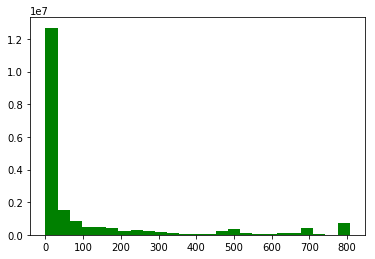

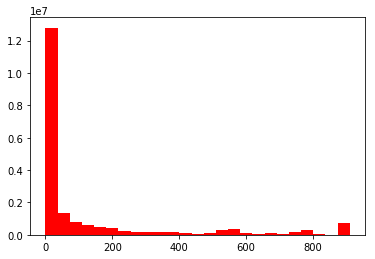

In [186]:
#Part2
#'set/SAM_4040.JPG' 1/1000 room
#'picture set/SAMAUNG/SAM_4065.JPG' 1/500
#'picture set/SAMAUNG/SAM_4066.JPG' 1/400
#'picture set/SAMAUNG/SAM_4087.JPG'
image0 = cv2.imread('set/SAM_4040.jpeg', cv2.IMREAD_COLOR) 
b0, g0, r0 = cv2.split(image0)
bf0 = b0.flatten()
gf0 = g0.flatten()
rf0 = r0.flatten()
print(bf0)

#compute B'^(g)
bf0G = bf0 ** (1 / aB)
gf0G = gf0 ** (1 / aG)
rf0G = rf0 ** (1 / aR)
#print(bf0G)
#brightnessB0G = (sum(bf0) / len(bf0)) ** (1 / aB)
#brightnessG0G = (sum(gf0) / len(gf0)) ** (1 / aG)
#brightnessR0G = (sum(rf0) / len(rf0)) ** (1 / aR)
#print(int(brightnessB0G), int(brightnessG0G), int(brightnessR0G))

#plot the histograms of image0's three channels
hist(bf0G, 25, facecolor = 'blue')
plt.show()
hist(gf0G, 25, facecolor = 'green')
plt.show()
hist(rf0G, 25, facecolor = 'red')
plt.show()

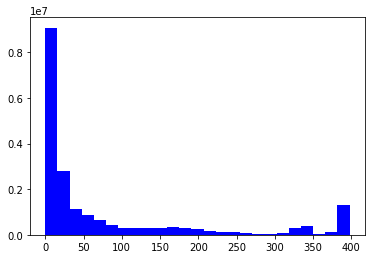

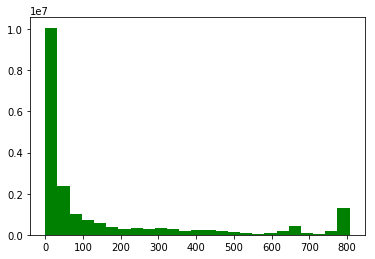

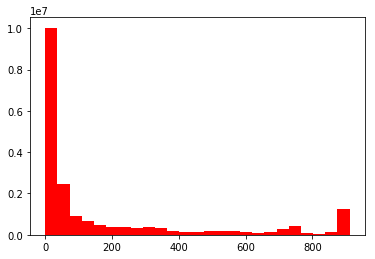

In [187]:
#image1
#'set/SAMAUNG/SAM_4043.jpeg' 1/500 room
#'set/SAM_4046.jpeg' 1/250 room
#'picture set/SAMAUNG/SAM_4092.JPG'
#'picture set/SAMAUNG/SAM_4068.JPG' 1/250
#'picture set/SAMAUNG/SAM_4072.JPG' 1/100
image1 = cv2.imread('set/SAM_4043.jpeg', cv2.IMREAD_COLOR)
b1, g1, r1 = cv2.split(image1)
bf1 = b1.flatten()
gf1 = g1.flatten()
rf1 = r1.flatten()
bf1G = bf1 ** (1 / aB)
gf1G = gf1 ** (1 / aG)
rf1G = rf1 ** (1 / aR)
#print(bf1G)
#brightnessB1 = (sum(bf1) / len(bf1)) ** (1 / aB)
#brightnessG1 = (sum(gf1) / len(gf1)) ** (1 / aG)
#brightnessR1 = (sum(rf1) / len(rf1)) ** (1 / aR)
#print(int(brightnessB1), int(brightnessG1), int(brightnessR1))

#plot the histograms of image1's three channels
hist(bf1G, 25, facecolor = 'blue')
plt.show()
hist(gf1G, 25, facecolor = 'green')
plt.show()
hist(rf1G, 25, facecolor = 'red')
plt.show()

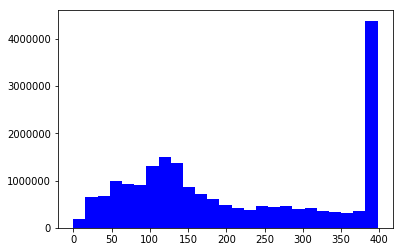

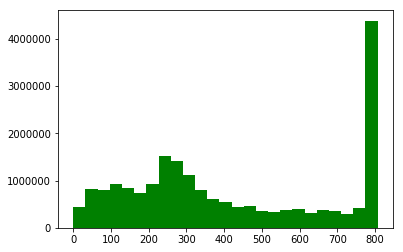

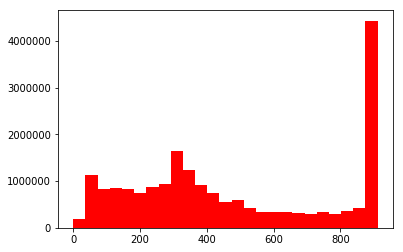

In [200]:
#image2
#'set/SAMAUNG/SAM_4046.jpeg' 1/250 room
#'set/SAM_4053.jpeg' 1/50 room
#'set/SAM_4053.jpeg'
#'picture set/SAMAUNG/SAM_4095.JPG'
#'picture set/SAMAUNG/SAM_4072.JPG' 1/100
#'picture set/SAMAUNG/SAM_4075.JPG' 1/50
#'picture set/SAMAUNG/SAM_4078.JPG' 1/25
#'picture set/SAMAUNG/SAM_4079.JPG' 1/20
#'picture set/SAMAUNG/SAM_4083.JPG' 1/10
image2 = cv2.imread('set/SAM_4053.jpeg', cv2.IMREAD_COLOR)
b2, g2, r2 = cv2.split(image2)
bf2 = b2.flatten()
gf2 = g2.flatten()
rf2 = r2.flatten()
bf2G = bf2 ** (1 / aB)
gf2G = gf2 ** (1 / aG)
rf2G = rf2 ** (1 / aR)
#brightnessB2 = (sum(bf2) / len(bf2)) ** (1 / aB)
#brightnessR2 = (sum(rf2) / len(rf2)) ** (1 / aR)
#brightnessR2 = (sum(rf2) / len(rf2)) ** (1 / aR)
#print(int(brightnessB2), int(brightnessG2), int(brightnessR2))

#plot the histograms of image2's three channels
hist(bf2G, 25, facecolor = 'blue')
plt.show()
hist(gf2G, 25, facecolor = 'green')
plt.show()
hist(rf2G, 25, facecolor = 'red')
plt.show()

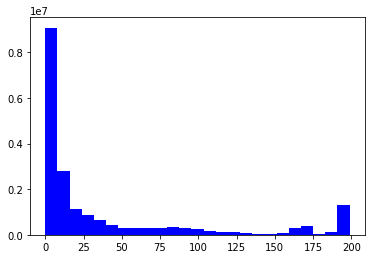

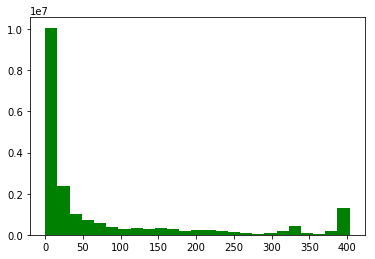

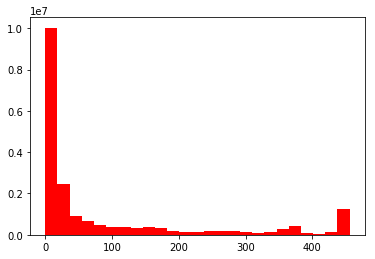

In [201]:
#compute B'^(g)/a1 and plot the new histogram
a1 = 2
bf1GDivideA1 = (bf1 ** (1 / aB)) / a1
gf1GDivideA1 = (gf1 ** (1 / aG)) / a1
rf1GDivideA1 = (rf1 ** (1 / aR)) / a1
hist(bf1GDivideA1, 25, facecolor = 'blue')
plt.show()
hist(gf1GDivideA1, 25, facecolor = 'green')
plt.show()
hist(rf1GDivideA1, 25, facecolor = 'red')
plt.show()

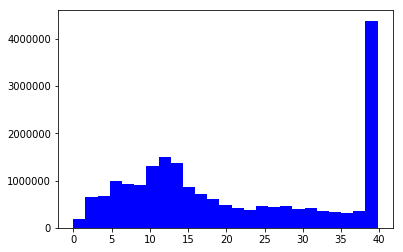

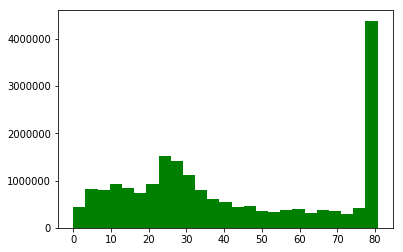

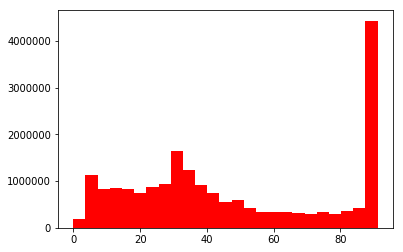

In [202]:
#compute B'(g)/a2 and polt the new histogram
a2 = 10
bf2GDivideA2 = (bf2 ** (1 / aB)) / a2
gf2GDivideA2 = (gf2 ** (1 / aG)) / a2
rf2GDivideA2 = (rf2 ** (1 / aR)) / a2
hist(bf2GDivideA2, 25, facecolor = 'blue')
plt.show()
hist(gf2GDivideA2, 25, facecolor = 'green')
plt.show()
hist(rf2GDivideA2, 25, facecolor = 'red')
plt.show()

In [203]:
#Part 3
#algorithm 1
#hdr1 blue
hdr1B = [[0] * 5472 for _ in range(3648)]
print(len(hdr1B[1]))
f = 0
for i in range(len(hdr1B)):
    for j in range(len(hdr1B[0])):
        if bf2[f] < 255:
            hdr1B[i][j] = bf2GDivideA2[f]
        elif bf1[f] < 255:
            hdr1B[i][j] = bf1GDivideA1[f]
        else:
            hdr1B[i][j] = bf0G[f]
        f += 1

5472


(array([9.429451e+06, 4.788659e+06, 1.964725e+06, 1.176400e+04,
        1.386290e+05, 5.797260e+05, 3.955600e+05, 2.692080e+05,
        1.193220e+05, 1.182200e+05, 6.728450e+05, 1.703990e+05,
        2.194300e+05, 5.700000e+01, 1.070000e+02, 2.270000e+02,
        3.290000e+02, 6.370000e+02, 1.033000e+03, 1.487000e+03,
        2.251000e+03, 1.344330e+05, 2.143330e+05, 1.731900e+04,
        7.117050e+05]),
 array([  0.      ,  15.915197,  31.830395,  47.745594,  63.66079 ,
         79.57599 ,  95.49119 , 111.40639 , 127.32158 , 143.23679 ,
        159.15198 , 175.06717 , 190.98238 , 206.89757 , 222.81277 ,
        238.72797 , 254.64316 , 270.55835 , 286.47357 , 302.38876 ,
        318.30396 , 334.21915 , 350.13434 , 366.04956 , 381.96475 ,
        397.87994 ], dtype=float32),
 <a list of 25 Patch objects>)

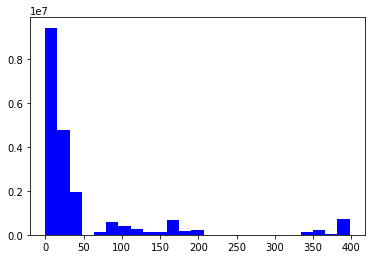

In [204]:
#plot the histogram of blue channel
hdr1BA = array(hdr1B, 'f')
hdr1BF = hdr1BA.flatten()
#hist(hdr1B, 25, facecolor = 'blue')
hist(hdr1BF, 25, facecolor = 'blue')

In [205]:
#hdr1 green
hdr1G = [[0] * 5472 for _ in range(3648)]
print(len(hdr1G[1]))
f = 0
for i in range(len(hdr1G)):
    for j in range(len(hdr1G[0])):
        if gf2[f] < 255:
            hdr1G[i][j] = gf2GDivideA2[f]
        elif gf1[f] < 255:
            hdr1G[i][j] = gf1GDivideA1[f]
        else:
            hdr1G[i][j] = gf0G[f]
        f += 1

5472


(array([9.509833e+06, 4.625704e+06, 1.965417e+06, 1.956300e+04,
        2.840690e+05, 4.090560e+05, 4.364250e+05, 3.092120e+05,
        1.249120e+05, 2.711440e+05, 5.450690e+05, 1.823440e+05,
        2.887640e+05, 4.500000e+01, 9.300000e+01, 1.690000e+02,
        3.160000e+02, 5.620000e+02, 1.184000e+03, 1.500000e+03,
        3.460000e+03, 2.312870e+05, 2.885600e+04, 1.264700e+04,
        7.102250e+05]),
 array([  0.      ,  32.291107,  64.582214,  96.87332 , 129.16443 ,
        161.45554 , 193.74664 , 226.03777 , 258.32886 , 290.61996 ,
        322.91107 , 355.20218 , 387.4933  , 419.78442 , 452.07553 ,
        484.36664 , 516.6577  , 548.94885 , 581.2399  , 613.53107 ,
        645.82214 , 678.1133  , 710.40436 , 742.6955  , 774.9866  ,
        807.2777  ], dtype=float32),
 <a list of 25 Patch objects>)

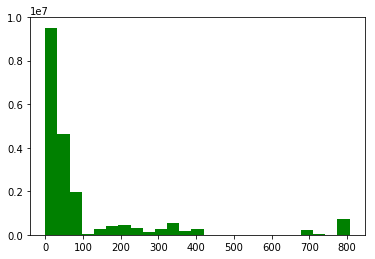

In [206]:
#plot the histogram of green channel
hdr1GA = array(hdr1G, 'f')
hdr1GF = hdr1GA.flatten()
hist(hdr1GF, 25, facecolor = 'green')

In [207]:
#hdr1 red
hdr1R = [[0] * 5472 for _ in range(3648)]
print(len(hdr1R[1]))
f = 0
for i in range(len(hdr1R)):
    for j in range(len(hdr1R[0])):
        if rf2[f] < 255:
            hdr1R[i][j] = rf2GDivideA2[f]
        elif rf1[f] < 255:
            hdr1R[i][j] = rf1GDivideA1[f]
        else:
            hdr1R[i][j] = rf0G[f]
        f += 1

5472


(array([9.239822e+06, 4.876536e+06, 2.047754e+06, 2.081500e+04,
        3.251290e+05, 3.073030e+05, 2.755030e+05, 3.340370e+05,
        2.315750e+05, 3.870040e+05, 4.844850e+05, 1.876600e+05,
        2.880220e+05, 2.100000e+01, 4.600000e+01, 4.900000e+01,
        1.000000e+02, 1.690000e+02, 3.530000e+02, 7.320000e+02,
        3.174300e+04, 1.905700e+05, 1.743300e+04, 6.588000e+03,
        7.084070e+05]),
 array([  0.      ,  36.45865 ,  72.9173  , 109.375946, 145.8346  ,
        182.29324 , 218.75189 , 255.21053 , 291.6692  , 328.12784 ,
        364.5865  , 401.04514 , 437.50378 , 473.9624  , 510.42105 ,
        546.8797  , 583.3384  , 619.797   , 656.2557  , 692.7143  ,
        729.173   , 765.6316  , 802.0903  , 838.5489  , 875.00757 ,
        911.4662  ], dtype=float32),
 <a list of 25 Patch objects>)

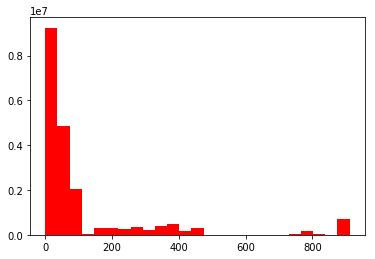

In [208]:
#plot the histogram of red channel
hdr1RA = array(hdr1R, 'f')
hdr1RF = hdr1RA.flatten()
hist(hdr1RF, 25, facecolor = 'red')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

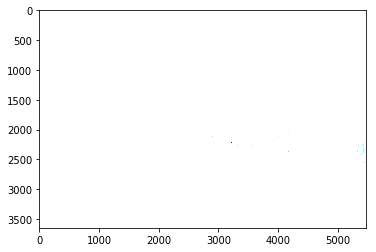

In [209]:
#merge the three channels and save that as an image
item = cv2.merge((hdr1BA, hdr1GA, hdr1RA))
imshow(item)
cv2.imwrite('2-18_1orim.jpg', item)

In [211]:
#Part 4
#reproduce composite image
toneMap = cv2.createTonemapDrago(1.0, 0.7)
ldrB = toneMap.process(hdr1BA)
ldrG = toneMap.process(hdr1GA)
ldrR = toneMap.process(hdr1RA)
ldr1 = cv2.merge((hdr1BA, hdr1GA, hdr1RA))
ldr2 = cv2.merge((ldrB, ldrG, ldrR))

ldr1 = 2 * ldr1
cv2.imwrite('output/2-18_1 1_100 1_25_.jpg', ldr1)

True

In [178]:
#algorithm 2
#hdr2 blue
hdr2B = [[0] * 5472 for _ in range(3648)]
print(len(hdr2B[1]))
f = 0
for i in range(len(hdr2B)):
    for j in range(len(hdr2B[0])):
        if bf2[f] < 255:
            hdr2B[i][j] = bf2GDivideA2[f]
        elif bf1[f] < 255:
            hdr2B[i][j] = (bf1GDivideA1[f] + bf2GDivideA2[f]) / 2
        else:
            hdr2B[i][j] = (bf0G[f] + bf1GDivideA1[f] + bf2GDivideA2[f]) / 3
        f += 1

5472


(array([1.679963e+07, 1.387000e+03, 2.689000e+03, 1.375600e+04,
        4.575320e+05, 7.600640e+05, 2.925460e+05, 7.605880e+05,
        1.300000e+01, 2.500000e+01, 1.150000e+02, 4.260000e+02,
        7.610000e+02, 1.246000e+03, 1.762000e+03, 2.023000e+03,
        2.969000e+03, 5.769000e+03, 3.739600e+04, 2.869900e+04,
        6.274800e+04, 1.427860e+05, 4.209280e+05, 6.610900e+04,
        9.988900e+04]),
 array([  0.      ,   6.635387,  13.270774,  19.90616 ,  26.541548,
         33.176933,  39.81232 ,  46.44771 ,  53.083096,  59.718483,
         66.35387 ,  72.98926 ,  79.62464 ,  86.26003 ,  92.89542 ,
         99.53081 , 106.16619 , 112.801575, 119.436966, 126.07235 ,
        132.70773 , 139.34312 , 145.97852 , 152.6139  , 159.24928 ,
        165.88467 ], dtype=float32),
 <a list of 25 Patch objects>)

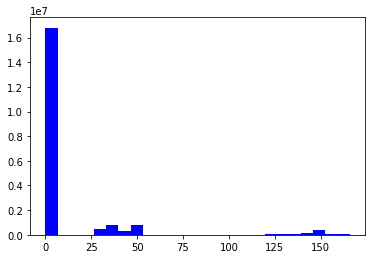

In [179]:
#plot the histogram of blue channel
hdr2BA = array(hdr2B, 'f')
hdr2BF = hdr2BA.flatten()
hist(hdr2BF, 25, facecolor = 'blue')

In [180]:
#hdr2 green
hdr2G = [[0] * 5472 for _ in range(3648)]
print(len(hdr2G[1]))
f = 0
for i in range(len(hdr2G)):
    for j in range(len(hdr2G[0])):
        if gf2[f] < 255:
            hdr2G[i][j] = gf2GDivideA2[f]
        elif gf1[f] < 255:
            hdr2G[i][j] = (gf1GDivideA1[f] + gf2GDivideA2[f]) / 2
        else:
            hdr2G[i][j] = (gf0G[f] + gf1GDivideA1[f] + gf2GDivideA2[f]) / 3
        f += 1

5472


(array([1.6704093e+07, 2.2590000e+03, 5.0900000e+03, 2.0338000e+04,
        4.6914000e+05, 7.2692200e+05, 3.6500700e+05, 8.0984500e+05,
        8.6000000e+01, 2.9500000e+02, 6.5200000e+02, 8.1600000e+02,
        1.1080000e+03, 1.6370000e+03, 2.1350000e+03, 3.3640000e+03,
        4.5970000e+03, 8.9430000e+03, 1.5530000e+04, 1.7615000e+04,
        1.1545000e+05, 1.6249700e+05, 3.8458800e+05, 2.9511000e+04,
        1.1033800e+05]),
 array([  0.      ,  13.457478,  26.914955,  40.372433,  53.82991 ,
         67.28739 ,  80.744865,  94.20235 , 107.65982 , 121.1173  ,
        134.57478 , 148.03226 , 161.48973 , 174.94722 , 188.4047  ,
        201.86217 , 215.31964 , 228.77713 , 242.2346  , 255.69208 ,
        269.14957 , 282.60703 , 296.0645  , 309.522   , 322.97946 ,
        336.43695 ], dtype=float32),
 <a list of 25 Patch objects>)

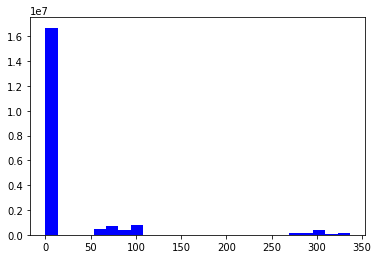

In [181]:
#plot the histogram of green channel
hdr2GA = array(hdr2G, 'f')
hdr2GF = hdr2GA.flatten()
hist(hdr2GF, 25, facecolor = 'blue')

In [182]:
#hdr2 red
hdr2R = [[0] * 5472 for _ in range(3648)]
print(len(hdr2R[1]))
f = 0
for i in range(len(hdr2R)):
    for j in range(len(hdr2R[0])):
        if rf2[f] < 255:
            hdr2R[i][j] = rf2GDivideA2[f]
        elif rf1[f] < 255:
            hdr2R[i][j] = (rf1GDivideA1[f] + rf2GDivideA2[f]) / 2
        else:
            hdr2R[i][j] = (rf0G[f] + rf1GDivideA1[f] + rf2GDivideA2[f]) / 3
        f += 1

5472


(array([1.6808684e+07, 3.4430000e+03, 7.1330000e+03, 2.7184000e+04,
        4.7178600e+05, 4.8758700e+05, 5.0713200e+05, 8.9828900e+05,
        1.4800000e+02, 3.0000000e+02, 5.0400000e+02, 8.1600000e+02,
        1.1460000e+03, 1.9680000e+03, 2.3770000e+03, 3.8540000e+03,
        5.0120000e+03, 7.9750000e+03, 1.5279000e+04, 5.7598000e+04,
        9.8588000e+04, 2.3785000e+05, 2.4051200e+05, 1.5067000e+04,
        6.1624000e+04]),
 array([  0.     ,  15.19328,  30.38656,  45.57984,  60.77312,  75.9664 ,
         91.15968, 106.35296, 121.54624, 136.73952, 151.9328 , 167.12608,
        182.31937, 197.51263, 212.70592, 227.8992 , 243.09248, 258.28577,
        273.47903, 288.67233, 303.8656 , 319.05887, 334.25217, 349.44543,
        364.63873, 379.832  ], dtype=float32),
 <a list of 25 Patch objects>)

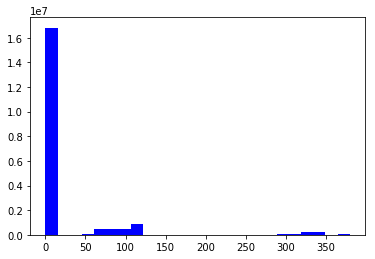

In [183]:
#plot the histogram of red channel
hdr2RA = array(hdr2R, 'f')
hdr2RF = hdr2RA.flatten()
hist(hdr2RF, 25, facecolor = 'blue')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

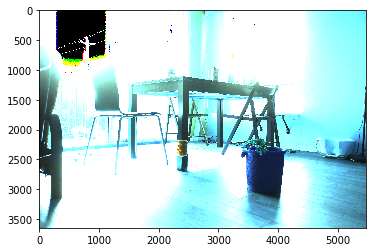

In [184]:
#merge the three channels and save that as an image
item2 = cv2.merge((hdr2BA, hdr2GA, hdr2RA))
imshow(item2)
cv2.imwrite('2-20_2ori.jpg', item2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

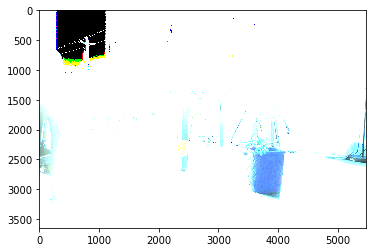

In [185]:
#tonemap2 = cv2.createTonemap(0.25)
#ldr2 = tonemap.process(item2)
#ldr2 = 3 * ldr2
#imshow(ldr2)
#cv2.imwrite('2-20_2 1_25.jpg', ldr)

#Part 4
tonemap2 = cv2.createTonemapDrago(1.0, 0.7)
ldr2B = tonemap2.process(hdr2BA)
ldr2G = tonemap2.process(hdr2GA)
ldr2R = tonemap2.process(hdr2RA)
ldr2 = cv2.merge((hdr2BA, hdr2GA, hdr2RA))

ldr2 = 5 * ldr2
imshow(ldr2)
cv2.imwrite('2-18_1 1_25.jpg', ldr2)